In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
data = pd.read_csv('CleanedFinalData.csv')
data

,Unnamed: 0,open,high,low,close,volume,date_parsed,cont_len,cont_pol,cont_sent,date_year,date_month,date_day
0,0,1358.98,1374.71,1358.98,1368.70,593003200,2012-04-11,108.142857,0.01,Positive,2012,4,11
1,1,1368.77,1388.13,1368.77,1387.56,547368832,2012-04-12,75.000000,0.11,Positive,2012,4,12
2,2,1387.61,1387.61,1369.85,1370.26,631237824,2012-04-13,73.000000,0.00,Neutral,2012,4,13
3,3,1370.27,1379.66,1365.38,1369.57,596952128,2012-04-16,188.500000,0.66,Positive,2012,4,16
4,4,1369.57,1392.76,1369.57,1390.78,566529216,2012-04-17,235.529412,0.10,Positive,2012,4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,1632,2674.88,2722.70,2667.84,2705.57,767958464,2018-10-25,89.500580,0.04,Positive,2018,10,25
1633,1633,2667.86,2692.38,2628.16,2658.69,870121024,2018-10-26,90.076709,0.04,Positive,2018,10,26
1634,1634,2682.65,2706.85,2603.54,2641.25,778263680,2018-10-29,98.429104,0.03,Positive,2018,10,29
1635,1635,2640.68,2685.43,2635.34,2682.63,888192192,2018-10-30,95.842273,0.03,Positive,2018,10,30


In [5]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,open,high,low,close,volume,date_parsed,cont_len,cont_pol,cont_sent,date_year,date_month,date_day
0,1358.98,1374.71,1358.98,1368.70,593003200,2012-04-11,108.142857,0.01,Positive,2012,4,11
1,1368.77,1388.13,1368.77,1387.56,547368832,2012-04-12,75.000000,0.11,Positive,2012,4,12
2,1387.61,1387.61,1369.85,1370.26,631237824,2012-04-13,73.000000,0.00,Neutral,2012,4,13
3,1370.27,1379.66,1365.38,1369.57,596952128,2012-04-16,188.500000,0.66,Positive,2012,4,16
4,1369.57,1392.76,1369.57,1390.78,566529216,2012-04-17,235.529412,0.10,Positive,2012,4,17


## Feature Engineering
Since, 'col_sent' column is a nominal categorical data. Let's do One-Hot Encoding.


In [6]:
sentiment = data[["cont_sent"]]

sentiment = pd.get_dummies(sentiment, drop_first= False)

sentiment.head()

,cont_sent_Negative,cont_sent_Neutral,cont_sent_Positive
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [7]:
data = pd.concat([data, sentiment], axis = 1)

Since, the column name looks way too long. Let's trim it out.

In [8]:
data = data.rename(columns={'cont_sent_Negative':'sent_neg','cont_sent_Neutral':'sent_neu','cont_sent_Positive':'sent_pos'})
data

,open,high,low,close,volume,date_parsed,cont_len,cont_pol,cont_sent,date_year,date_month,date_day,sent_neg,sent_neu,sent_pos
0,1358.98,1374.71,1358.98,1368.70,593003200,2012-04-11,108.142857,0.01,Positive,2012,4,11,0,0,1
1,1368.77,1388.13,1368.77,1387.56,547368832,2012-04-12,75.000000,0.11,Positive,2012,4,12,0,0,1
2,1387.61,1387.61,1369.85,1370.26,631237824,2012-04-13,73.000000,0.00,Neutral,2012,4,13,0,1,0
3,1370.27,1379.66,1365.38,1369.57,596952128,2012-04-16,188.500000,0.66,Positive,2012,4,16,0,0,1
4,1369.57,1392.76,1369.57,1390.78,566529216,2012-04-17,235.529412,0.10,Positive,2012,4,17,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,2674.88,2722.70,2667.84,2705.57,767958464,2018-10-25,89.500580,0.04,Positive,2018,10,25,0,0,1
1633,2667.86,2692.38,2628.16,2658.69,870121024,2018-10-26,90.076709,0.04,Positive,2018,10,26,0,0,1
1634,2682.65,2706.85,2603.54,2641.25,778263680,2018-10-29,98.429104,0.03,Positive,2018,10,29,0,0,1
1635,2640.68,2685.43,2635.34,2682.63,888192192,2018-10-30,95.842273,0.03,Positive,2018,10,30,0,0,1


# Create Target Variable

Creating a target variable where :

    i. Value is 1 if 'Today's closing price is greater than yesterday's closing price'
    ii. Value is 0 if 'Today's closing price is lesser than yesterday's closing price'

In [9]:
# opening_price = data['open'].iloc[1:]
# closing_price = data['close'].iloc[:-1]
# target_variable = [0]

# zip_object = zip(opening_price, closing_price)

# for i, j in zip_object:
#     if i > j:
#         profit = 1
#     else:
#         profit = 0
#     target_variable.append(profit)
    
# data['target_variable'] = pd.DataFrame(target_variable)
# data['target_variable']


Let's subtract the upper row value from lower row value of 'Close' Column

In [10]:
data['target_variable'] = data['close'].diff().fillna(0)
data['target_variable']

0        0.00
1       18.86
2      -17.30
3       -0.69
4       21.21
        ...  
1632    49.47
1633   -46.88
1634   -17.44
1635    41.38
1636    29.11
Name: target_variable, Length: 1637, dtype: float64

Substituting value with 1 if value is positive or with 0 if value is negative.

In [11]:
def get_target_variable(value):
    if value > 0:
        return 1
    else:
        return 0

In [12]:
data['target_variable'] = data.apply(lambda x: get_target_variable(x['target_variable']),axis =1)
data['target_variable'] 

0       0
1       1
2       0
3       0
4       1
       ..
1632    1
1633    0
1634    0
1635    1
1636    1
Name: target_variable, Length: 1637, dtype: int64

## Let's check if our calculation for target variable is correct or not.

In [13]:
data[['close','target_variable']].head(20)

,close,target_variable
0,1368.70,0
1,1387.56,1
2,1370.26,0
3,1369.57,0
4,1390.78,1
5,1376.92,0
6,1378.53,1
7,1366.94,0
8,1371.97,1
9,1390.69,1


 Seems like it's correct let's move forwards to other steps now.

In [14]:
data

,open,high,low,close,volume,date_parsed,cont_len,cont_pol,cont_sent,date_year,date_month,date_day,sent_neg,sent_neu,sent_pos,target_variable
0,1358.98,1374.71,1358.98,1368.70,593003200,2012-04-11,108.142857,0.01,Positive,2012,4,11,0,0,1,0
1,1368.77,1388.13,1368.77,1387.56,547368832,2012-04-12,75.000000,0.11,Positive,2012,4,12,0,0,1,1
2,1387.61,1387.61,1369.85,1370.26,631237824,2012-04-13,73.000000,0.00,Neutral,2012,4,13,0,1,0,0
3,1370.27,1379.66,1365.38,1369.57,596952128,2012-04-16,188.500000,0.66,Positive,2012,4,16,0,0,1,0
4,1369.57,1392.76,1369.57,1390.78,566529216,2012-04-17,235.529412,0.10,Positive,2012,4,17,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,2674.88,2722.70,2667.84,2705.57,767958464,2018-10-25,89.500580,0.04,Positive,2018,10,25,0,0,1,1
1633,2667.86,2692.38,2628.16,2658.69,870121024,2018-10-26,90.076709,0.04,Positive,2018,10,26,0,0,1,0
1634,2682.65,2706.85,2603.54,2641.25,778263680,2018-10-29,98.429104,0.03,Positive,2018,10,29,0,0,1,0
1635,2640.68,2685.43,2635.34,2682.63,888192192,2018-10-30,95.842273,0.03,Positive,2018,10,30,0,0,1,1


In [15]:
data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'date_parsed', 'cont_len',
       'cont_pol', 'cont_sent', 'date_year', 'date_month', 'date_day',
       'sent_neg', 'sent_neu', 'sent_pos', 'target_variable'],
      dtype='object')

In [16]:
X = data.loc[:, ['open', 'high', 'low', 'close', 'volume', 'cont_len', 
       'cont_pol', 'date_year', 'date_month', 'date_day',
       'sent_neg', 'sent_neu', 'sent_pos']]
X.head()

,open,high,low,close,volume,cont_len,cont_pol,date_year,date_month,date_day,sent_neg,sent_neu,sent_pos
0,1358.98,1374.71,1358.98,1368.70,593003200,108.142857,0.01,2012,4,11,0,0,1
1,1368.77,1388.13,1368.77,1387.56,547368832,75.000000,0.11,2012,4,12,0,0,1
2,1387.61,1387.61,1369.85,1370.26,631237824,73.000000,0.00,2012,4,13,0,1,0
3,1370.27,1379.66,1365.38,1369.57,596952128,188.500000,0.66,2012,4,16,0,0,1
4,1369.57,1392.76,1369.57,1390.78,566529216,235.529412,0.10,2012,4,17,0,0,1


In [17]:
y = data.loc[:,'target_variable']
y.head()

0    0
1    1
2    0
3    0
4    1
Name: target_variable, dtype: int64

In [18]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [19]:
X.columns

Index(['open', 'high', 'low', 'close', 'volume', 'cont_len', 'cont_pol',
       'date_year', 'date_month', 'date_day', 'sent_neg', 'sent_neu',
       'sent_pos'],
      dtype='object')

In [20]:
print(selection.feature_importances_)

[0.13027506 0.07457748 0.07645893 0.12206609 0.14393903 0.12232992
 0.09944649 0.02762388 0.07395069 0.11864726 0.0037627  0.0018617
 0.00506077]


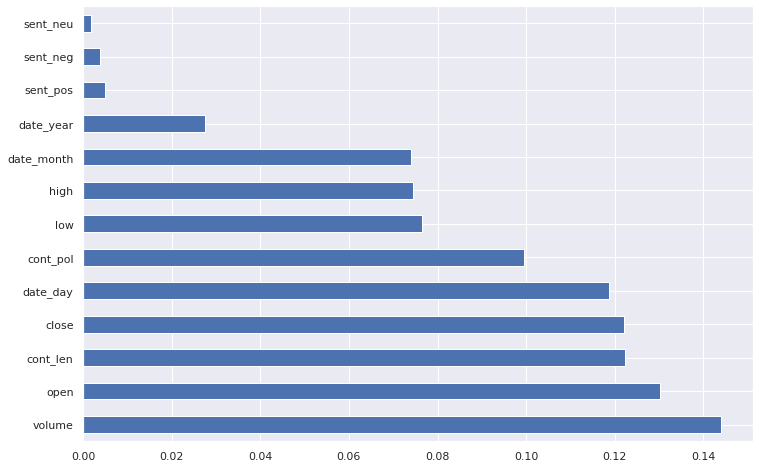

In [21]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

## Summary of Feature Engineering

So, basically we can say, Our target variable is highly related to:

    i. Volume
    ii. Opening Price
    iii. Closing price
    iv. Comment Length
    v. Day the comment is posted
    vi. Content Polarity/ Sentiment analysis

# EDA

We have clean data now so,Let's Explore the data now.

## 1. Heatmap
    

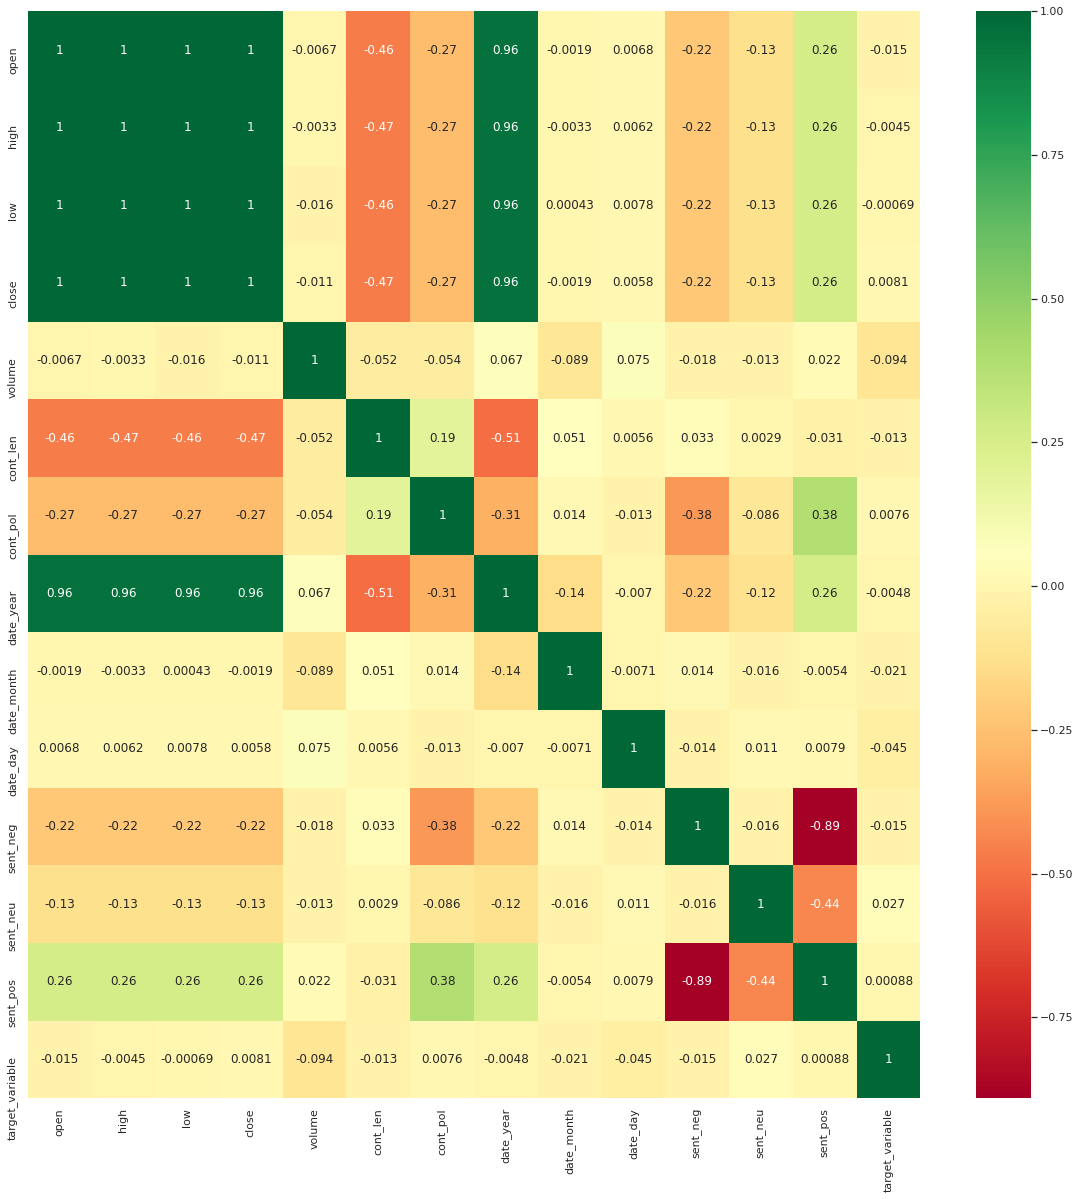

In [22]:
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

### Summary of Heatmap:
    
Heatmap shows that:

    i. Target variable is highly correlated to 'Volume', 'Closing price', 'Opening price', 'Comment length'  
    and 'Content Polarity' (Sentiment Analysis).
    ii. Suprisingly, Comment length is also highly correlated to 'Open', 'Close', 'High' and 'Low'.
    iii. Seems like the lenght of comment changed as per the year.
    iv. Volume is highly correlated with all other variables other than date( Year and Day).



## Barplot
    
Let's see how 'Sentiment Analysis' affects 'Target Variable'

<AxesSubplot:xlabel='cont_sent', ylabel='target_variable'>

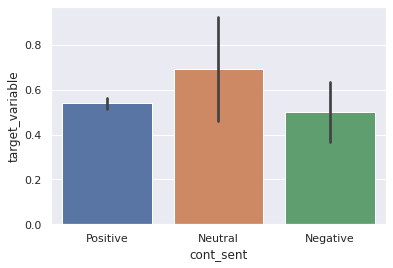

In [23]:
sns.barplot(x= data['cont_sent'],y=data['target_variable'])

## Summary of Barplot:
    i. Seems like if our sentiment analysis is negative, our target variable value appears to little.
    ii. Surprisingly, even if our sentiment analysis is positive,  our target variable value does not really 
    increase as we were expecting it to be.
    iii. But the target variable appears to more when the sentiment analysis is neutral.

In [24]:
data["cont_sent"].value_counts()

Positive    1572
Negative      52
Neutral       13
Name: cont_sent, dtype: int64

Seems like positive sentiments are more in number in comparison to negative and neutral comments but though lets clarify it visually. 


# Count plot

<AxesSubplot:xlabel='cont_sent', ylabel='count'>

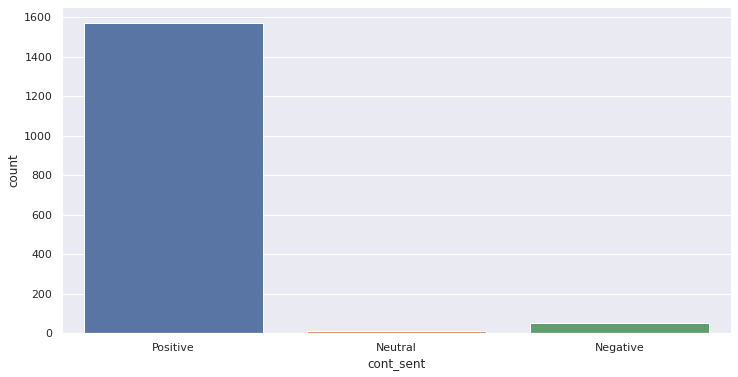

In [25]:
plt.figure(figsize=(12,6))
sns.countplot(x='cont_sent',data=data)

## Summary:

As expected from above calculation our positive sentimental analysis is more in comparison to neutral and negative sentimental analysis.

### Count Plot with target varaible

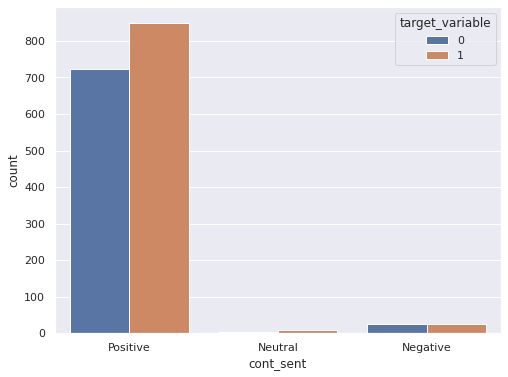

In [26]:
plt.figure(figsize = (8,6))
sns.countplot(data = data,x ='cont_sent',hue = 'target_variable' )
plt.show()


## Summary

1. Most of the positive sentiment analysis has target variable 1(Profit) but not 0 (Loss).
2. All the neutral snetiment analysis has target varaible 1 i.e. has led to profit.
3. Negative sentiment analysis equally has target variable 0 (Loss) and 1 (Profit).

# Distribution plot
Let's explore the type of distribution that our data is divided into.

In [27]:
feat = ['open','high','low','close','volume']
list(enumerate(feat))

[(0, 'open'), (1, 'high'), (2, 'low'), (3, 'close'), (4, 'volume')]

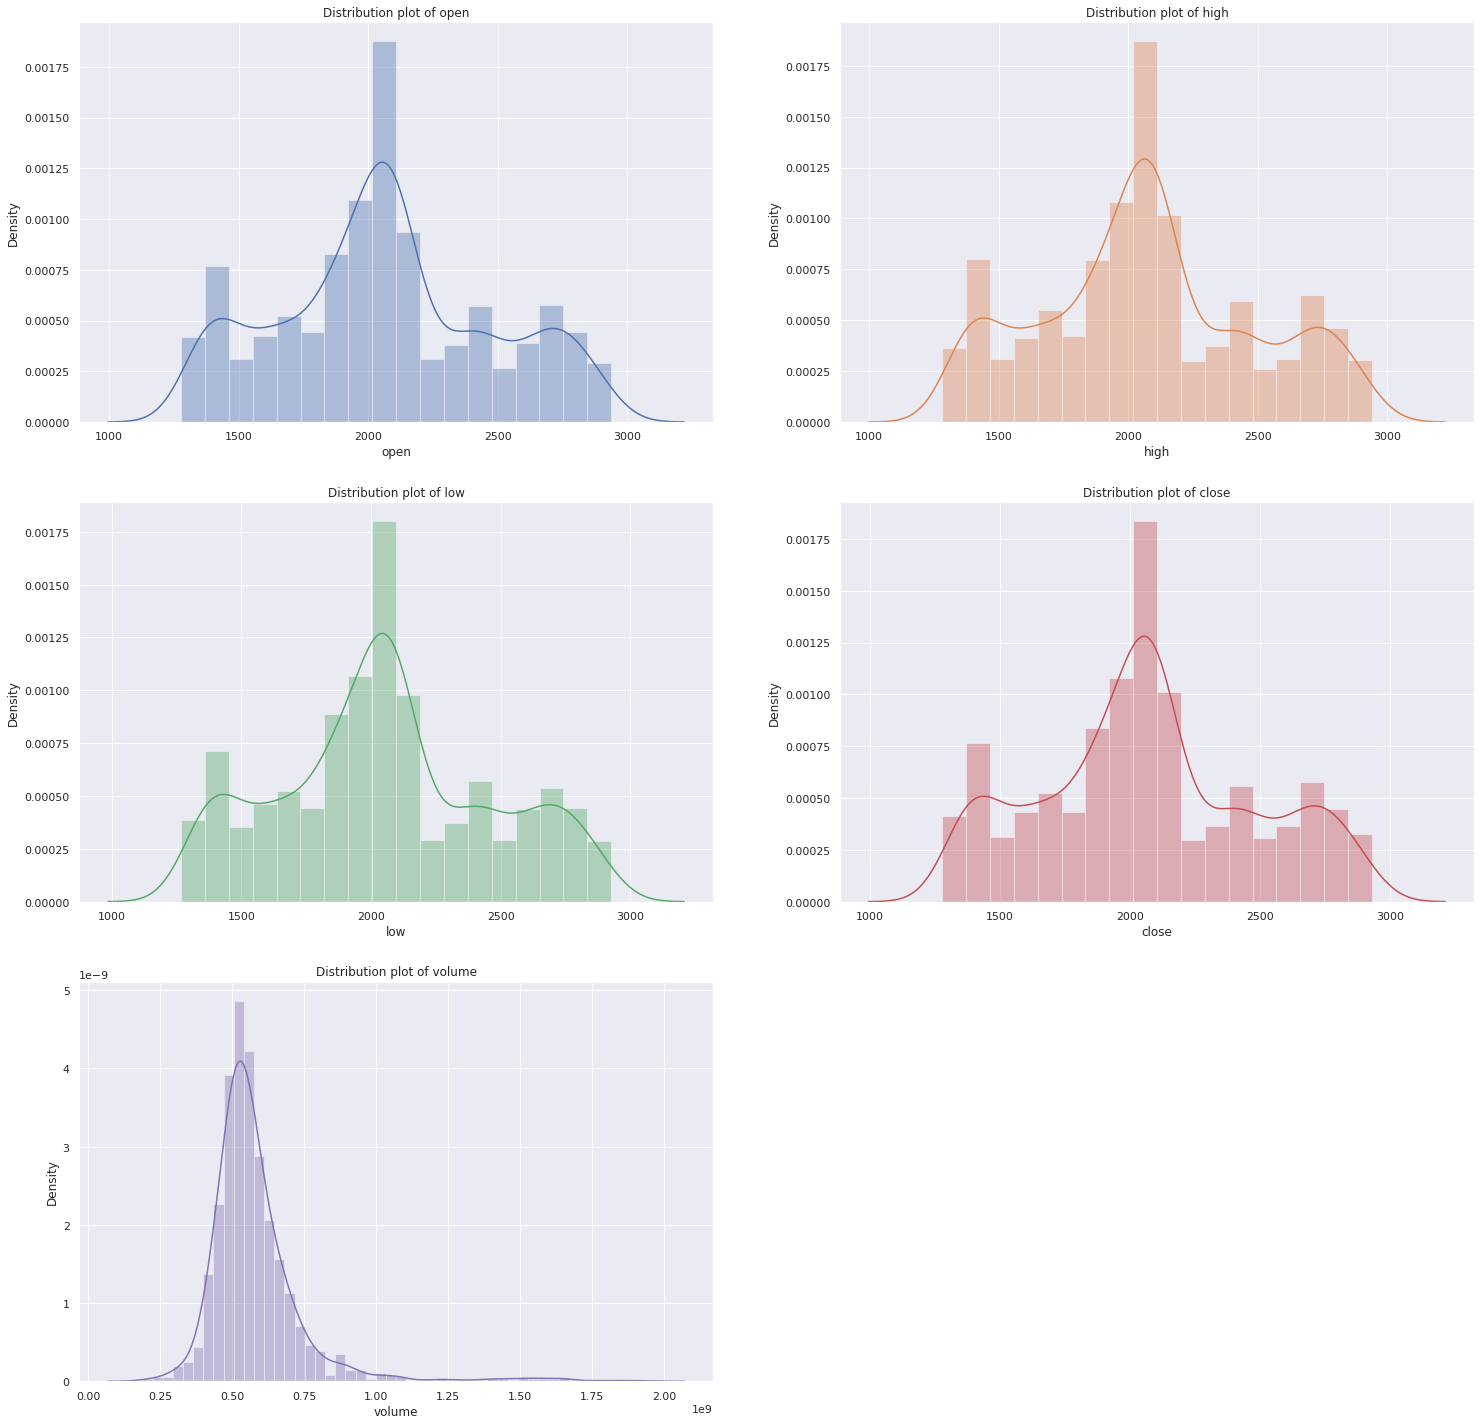

In [28]:
plt.figure(figsize=(25,25))        
for i in enumerate(feat):
    plt.subplot(3,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.distplot(data[i[1]] , color = base_color)
    plt.xlabel(i[1]);
    plt.title(f'Distribution plot of {i[1]}')

## Summary

1. All our variables are normally distributed.
2. But there seems to be quite a outlier in the data. 
3. Before exploring other plot. Let's deal with ourliers first.
4. We're going to confirm outliers with Boxplot.

# Box plot

Let's explore the distribution for each univariate groups of numerical data.

In [29]:
feat = ['open','high','low','close','volume','cont_pol']
list(enumerate(feat))

[(0, 'open'),
 (1, 'high'),
 (2, 'low'),
 (3, 'close'),
 (4, 'volume'),
 (5, 'cont_pol')]

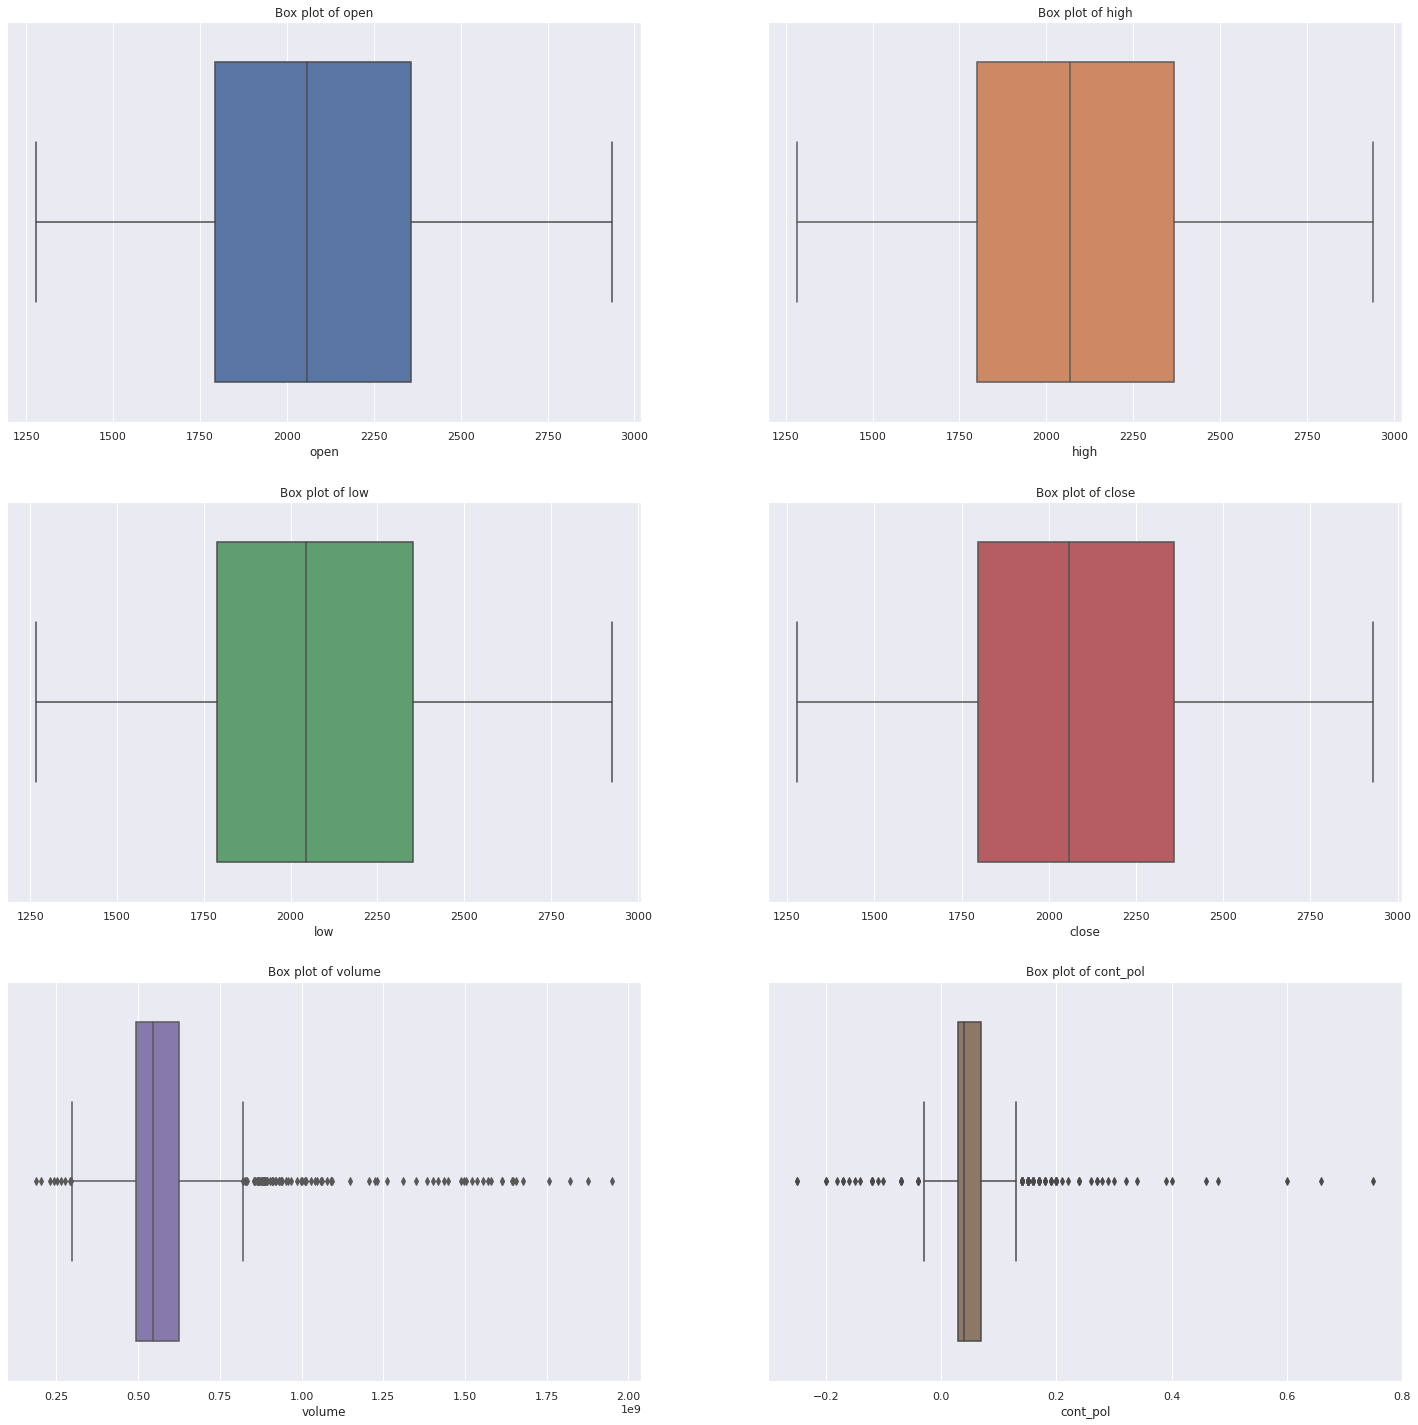

In [30]:
plt.figure(figsize=(25,25))        
for i in enumerate(feat):
    plt.subplot(3,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.boxplot(data[i[1]] , color = base_color)
    plt.xlabel(i[1]);
    plt.title(f'Box plot of {i[1]}')    

## Summary of Box plot
    i. Seems like all other features are uniformly distributed other than 'Volume' and 'cont_pol'.
    ii. Volume and cont_pol has high number of outliers so lets fix that first.
        - Find the IQR (Interquartile Range)
        - Find the upper and lower limit
        - Find outliers
        - Treat outliers
        - Compare the plots after trimming   

### 1. Find the IQR

In [31]:
# For Volume
percentile25Vol = data['volume'].quantile(0.25)
percentile75Vol = data['volume'].quantile(0.75)
iqr_vol = percentile75Vol - percentile25Vol

# For Content Polarity
percentile25Pol = data['cont_pol'].quantile(0.25)
percentile75Pol = data['cont_pol'].quantile(0.75)
iqr_pol = percentile75Pol - percentile25Pol

percentile25Vol, percentile75Vol, iqr_vol, percentile25Pol, percentile75Pol, iqr_pol

(493300864.0, 624200640.0, 130899776.0, 0.03, 0.07, 0.04000000000000001)

### 2. Find the upper and lower limits

In [32]:
# For Volume
upper_limit_vol = percentile75Vol + 1.5 * iqr_vol
lower_limit_vol = percentile25Vol - 1.5 * iqr_vol

# For Content Polarity
upper_limit_pol = percentile75Pol + 1.5 * iqr_pol
lower_limit_pol = percentile25Pol - 1.5 * iqr_pol

upper_limit_vol, lower_limit_vol, upper_limit_pol, lower_limit_pol

(820550304.0, 296951200.0, 0.13, -0.030000000000000013)

### 3. Find Outliers

In [33]:
# For Volume
data[data['volume'] > upper_limit_vol]
data[data['volume'] < lower_limit_vol]

# For Content Polarity
data[data['cont_pol'] > upper_limit_pol]
data[data['cont_pol'] < lower_limit_pol]

,open,high,low,close,volume,date_parsed,cont_len,cont_pol,cont_sent,date_year,date_month,date_day,sent_neg,sent_neu,sent_pos,target_variable
5,1385.08,1390.46,1370.30,1376.92,676165120,2012-04-19,93.500000,-0.20,Negative,2012,4,19,1,0,0,0
98,1410.08,1410.08,1397.01,1399.48,406387488,2012-08-30,207.230769,-0.04,Negative,2012,8,30,1,0,0,0
115,1456.94,1463.24,1441.59,1441.59,609070272,2012-09-25,57.000000,-0.12,Negative,2012,9,25,1,0,0,0
137,1409.74,1421.12,1405.14,1412.97,577411712,2012-10-25,52.909091,-0.07,Negative,2012,10,25,1,0,0,1
140,1412.20,1428.35,1412.20,1427.59,616103488,2012-11-01,43.000000,-0.12,Negative,2012,11,1,1,0,0,1
144,1428.27,1428.27,1388.14,1394.53,712068608,2012-11-07,10.000000,-0.20,Negative,2012,11,7,1,0,0,0
153,1386.82,1389.77,1377.04,1387.81,529088608,2012-11-20,175.500000,-0.14,Negative,2012,11,20,1,0,0,1
161,1409.43,1413.95,1405.93,1413.94,523124000,2012-12-06,174.400000,-0.12,Negative,2012,12,6,1,0,0,1
166,1428.48,1431.36,1416.00,1419.45,522071712,2012-12-13,271.000000,-0.15,Negative,2012,12,13,1,0,0,0
174,1418.10,1418.10,1401.58,1402.43,411216000,2012-12-28,133.200000,-0.07,Negative,2012,12,28,1,0,0,0


### 4. Treat Outliers

Since there are lot of outliers, if we'll trim/remove it all we'll have very less data so lets do 'Quantile based flooring and capping'.

    1. Replace all the outliers that are higher than upper limits with upper limit's value.
    2. Replace all the outliers that are higher than upper limits with upper limit's value.
    
### Quantile based Flooring and Capping

In [34]:
# For Volume
data['volume'] = np.where(
    data['volume'] >= upper_limit_vol,
    upper_limit_vol,
    np.where(
        data['volume'] <= lower_limit_vol,
        lower_limit_vol,
        data['volume']
    )    
   )

# For Content Polarity
data['cont_pol'] = np.where(
    data['cont_pol'] >= upper_limit_pol,
    upper_limit_pol,
    np.where(
        data['cont_pol'] <= lower_limit_pol,
        lower_limit_pol,
        data['cont_pol']
    )    
   )

In [35]:
data

,open,high,low,close,volume,date_parsed,cont_len,cont_pol,cont_sent,date_year,date_month,date_day,sent_neg,sent_neu,sent_pos,target_variable
0,1358.98,1374.71,1358.98,1368.70,593003200.0,2012-04-11,108.142857,0.01,Positive,2012,4,11,0,0,1,0
1,1368.77,1388.13,1368.77,1387.56,547368832.0,2012-04-12,75.000000,0.11,Positive,2012,4,12,0,0,1,1
2,1387.61,1387.61,1369.85,1370.26,631237824.0,2012-04-13,73.000000,0.00,Neutral,2012,4,13,0,1,0,0
3,1370.27,1379.66,1365.38,1369.57,596952128.0,2012-04-16,188.500000,0.13,Positive,2012,4,16,0,0,1,0
4,1369.57,1392.76,1369.57,1390.78,566529216.0,2012-04-17,235.529412,0.10,Positive,2012,4,17,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1632,2674.88,2722.70,2667.84,2705.57,767958464.0,2018-10-25,89.500580,0.04,Positive,2018,10,25,0,0,1,1
1633,2667.86,2692.38,2628.16,2658.69,820550304.0,2018-10-26,90.076709,0.04,Positive,2018,10,26,0,0,1,0
1634,2682.65,2706.85,2603.54,2641.25,778263680.0,2018-10-29,98.429104,0.03,Positive,2018,10,29,0,0,1,0
1635,2640.68,2685.43,2635.34,2682.63,820550304.0,2018-10-30,95.842273,0.03,Positive,2018,10,30,0,0,1,1


### 5. Compare the plot after trimming

In [36]:
feat = ['volume','cont_pol']
list(enumerate(feat))

[(0, 'volume'), (1, 'cont_pol')]

# Boxplot with outliers

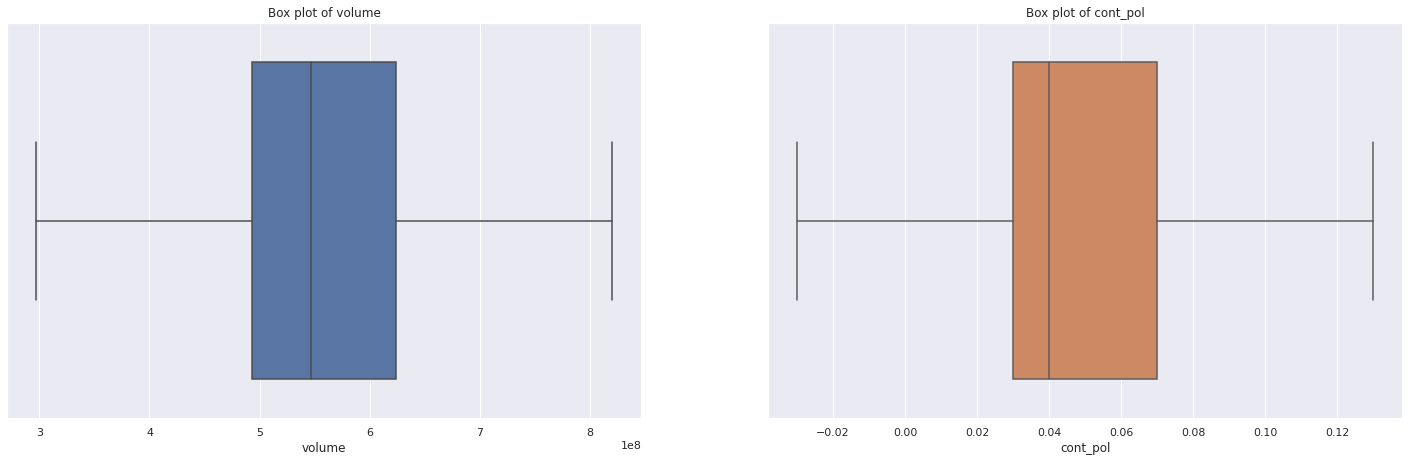

In [37]:
plt.figure(figsize=(25,16))

for i in enumerate(feat):
    plt.subplot(2,2,i[0]+1)
    base_color = sns.color_palette()[i[0]]
    sns.boxplot(data[i[1]] , color = base_color)
    plt.xlabel(i[1]);
    plt.title(f'Box plot of {i[1]}')

## Summary:

    We've removed the outliers from 'Volume' and 'cont_pol' variable.
    It seems like our data is free from outliers. 
    Let's explore other plot.

# Line plot

In [38]:
feature = ['open','high','low','close','volume']
list(enumerate(feature))

[(0, 'open'), (1, 'high'), (2, 'low'), (3, 'close'), (4, 'volume')]

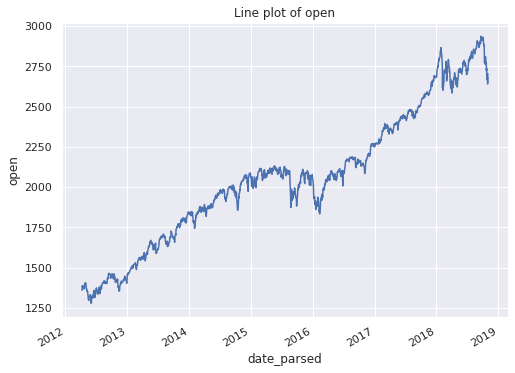

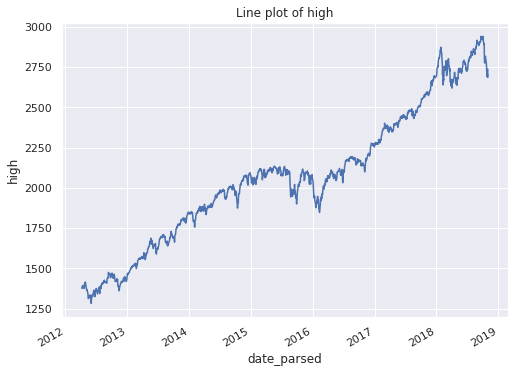

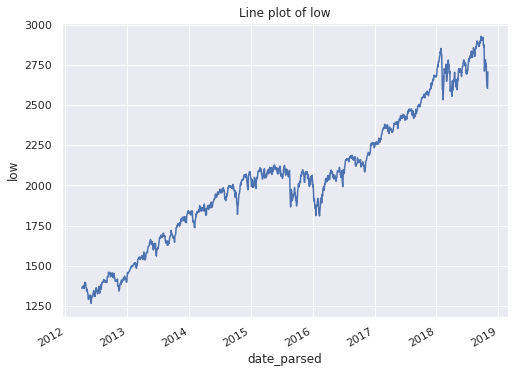

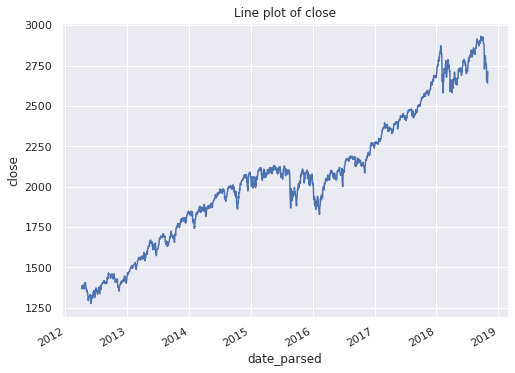

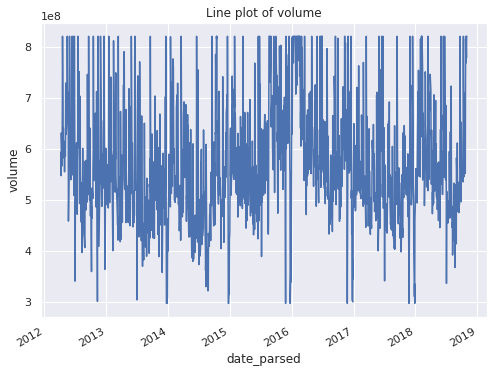

In [39]:
new_data = data.copy()
new_data.index = pd.DatetimeIndex(new_data['date_parsed'])

for i in feature:
    plt.figure(figsize = (8,6))
    new_data[i].plot()
    plt.ylabel(i)
    plt.title(f'Line plot of {i}')
    plt.show()

## Summary:

1. All the value of Open, Close, High and Close are increased as per the time.
2. But Volume keeps on changing in between.

# Pickling

Saving the data to csv format 

In [40]:
data.to_csv('FinalDataset.csv')